In [19]:
import keras 
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow as tf

In [2]:
import os
current_path = os.getcwd()

races_path = current_path+"\Data\images\Images\\"

In [22]:
pre_trained_model = InceptionV3(input_shape=(224,224,3),include_top = False, weights='imagenet')

In [23]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(races_path,
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 subset="training",
                                                 shuffle=True,
                                                 seed=42,
                                                 class_mode = 'categorical')

validation_set = train_datagen.flow_from_directory(races_path,
                                                 shuffle=False,
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 subset="validation",
                                                 
                                                 seed=42,
                                                 class_mode = 'categorical')

Found 2911 images belonging to 20 classes.
Found 718 images belonging to 20 classes.


In [27]:
from keras.models import Model
from keras.layers import Dropout

x = Flatten()(pre_trained_model.output)

x = Dense(1024, activation='relu')(x)

x = Dropout(0.3)(x)

x = Dense(20, activation='softmax')(x)

model = Model(pre_trained_model.input,x)

model.compile(loss='categorical_crossentropy',
                        optimizer=optimizers.Adam(),
                        metrics=['accuracy'])


In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
______________________________________________________________________________________________

In [47]:
history = model.fit_generator(training_set,                 
                    epochs = 20, verbose=True, 
                    validation_data = validation_set)

Epoch 1/20
364/364 [==============================] - 127s 349ms/step - loss: 0.5871 - accuracy: 0.8959 - val_loss: 1.2710 - val_accuracy: 0.8565
Epoch 2/20
364/364 [==============================] - 133s 365ms/step - loss: 0.5271 - accuracy: 0.8863 - val_loss: 0.8693 - val_accuracy: 0.8844
Epoch 3/20
364/364 [==============================] - 133s 366ms/step - loss: 0.4630 - accuracy: 0.9042 - val_loss: 1.1407 - val_accuracy: 0.8412
Epoch 4/20
364/364 [==============================] - 126s 347ms/step - loss: 0.4427 - accuracy: 0.8959 - val_loss: 1.3768 - val_accuracy: 0.8607
Epoch 5/20
364/364 [==============================] - 126s 347ms/step - loss: 0.5578 - accuracy: 0.9062 - val_loss: 1.3549 - val_accuracy: 0.8733
Epoch 6/20
364/364 [==============================] - 126s 347ms/step - loss: 0.5685 - accuracy: 0.9035 - val_loss: 1.1418 - val_accuracy: 0.8482
Epoch 7/20
364/364 [==============================] - 127s 348ms/step - loss: 0.3955 - accuracy: 0.9014 - val_loss: 1.4317 -

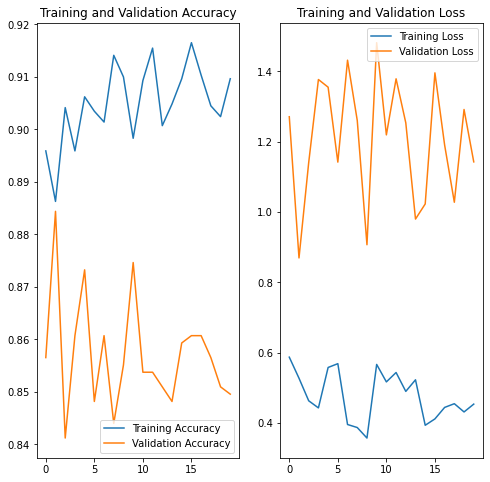

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
y_prob = model.predict(validation_set) 
y_classes = y_prob.argmax(axis=-1)

In [51]:
label_list=[]
for i in validation_set.class_indices.keys():
    label_list.append(i)

In [52]:
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_classes, validation_set.classes)

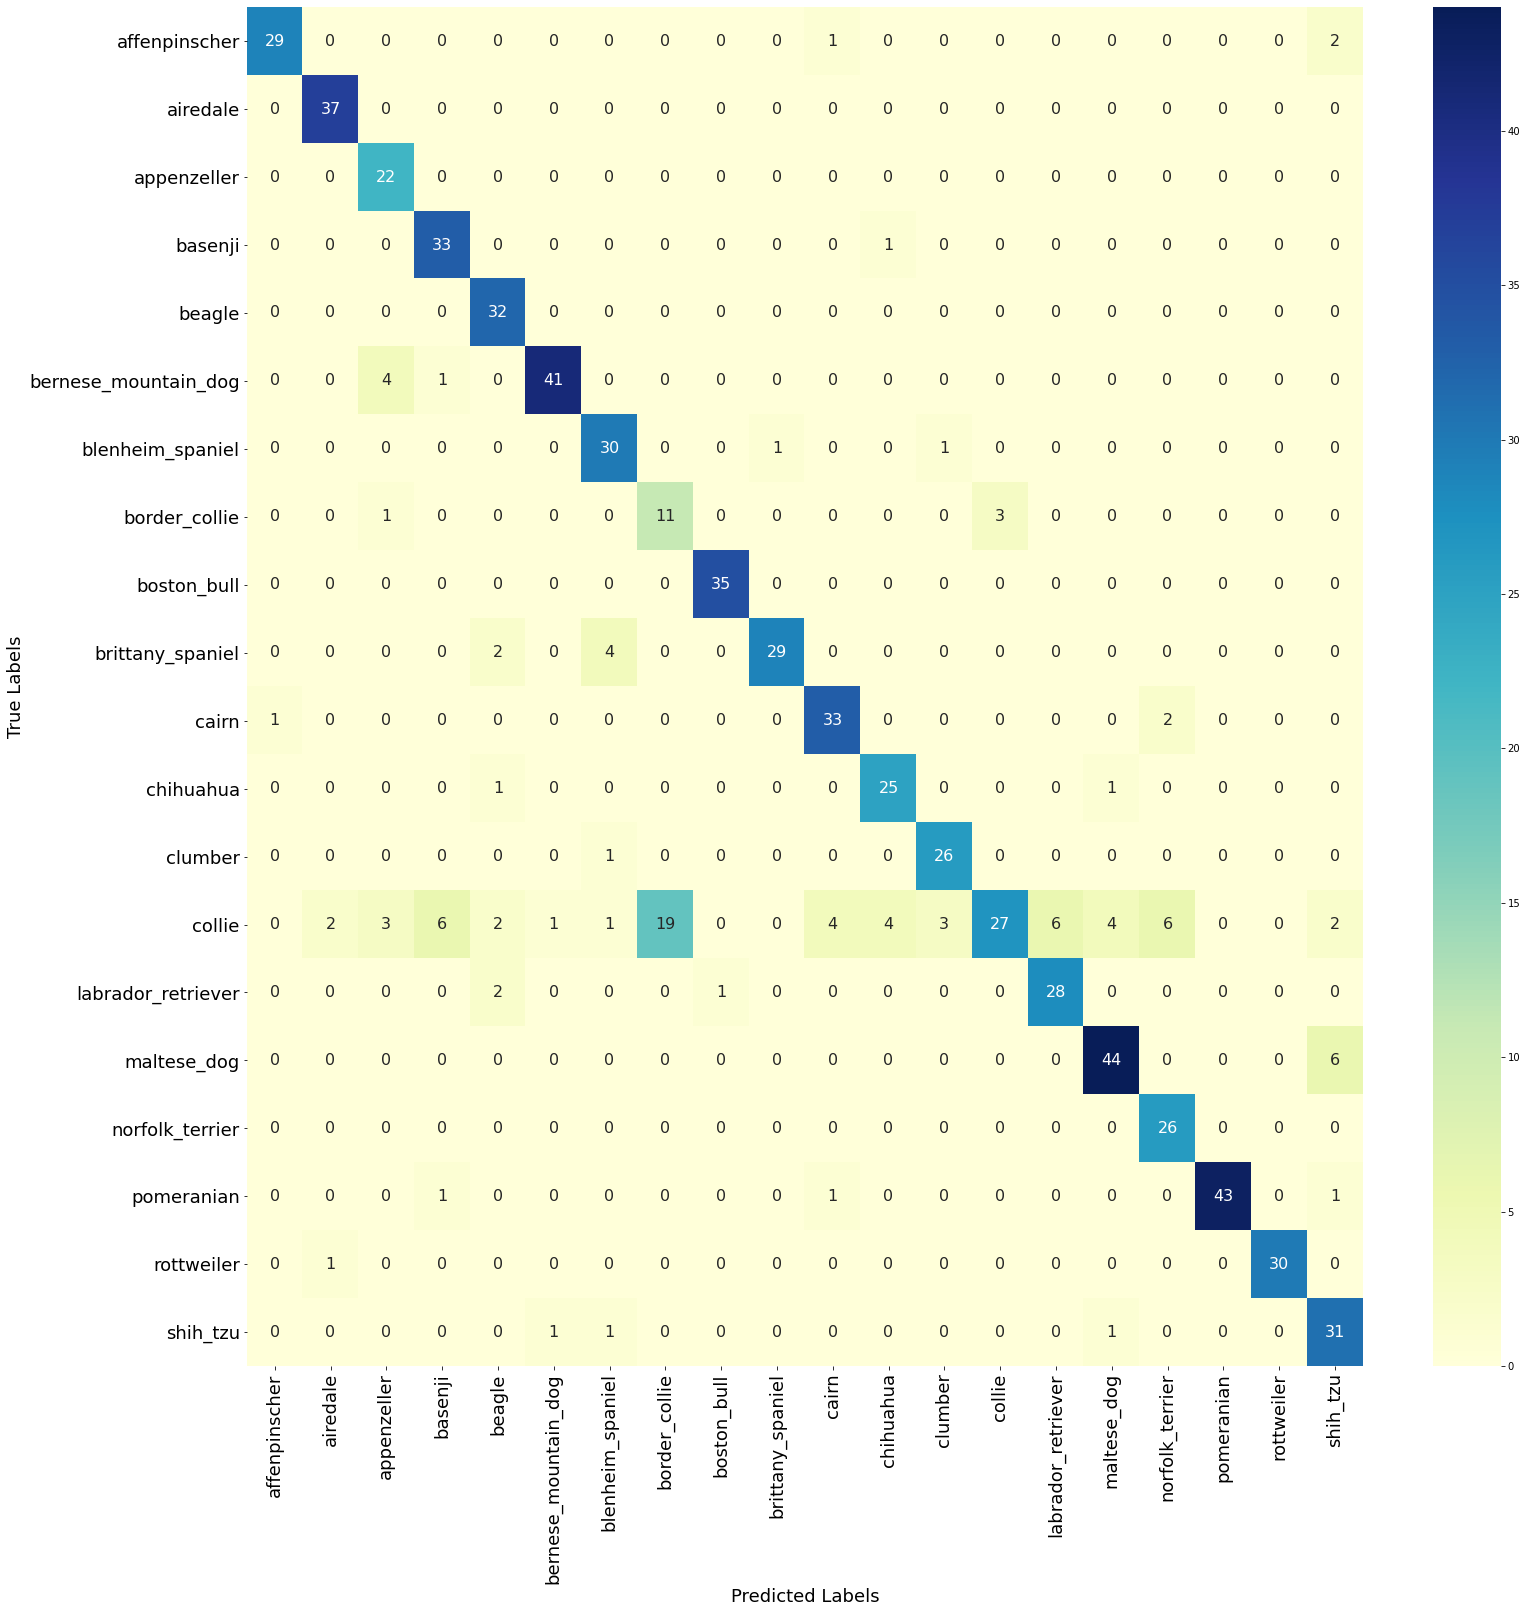

In [53]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confu
df_cm = pd.DataFrame(array, index = [i for i in label_list],
                  columns = [i for i in label_list])
plt.figure(figsize = (25,25))


sn.heatmap(df_cm, annot=True, cmap="YlGnBu",annot_kws={"size": 16})
plt.xlabel("Predicted Labels",fontsize=18)
plt.ylabel("True Labels",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.show()

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_classes, validation_set.classes))


              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.93      1.00      0.96        37
           2       0.73      1.00      0.85        22
           3       0.80      0.97      0.88        34
           4       0.82      1.00      0.90        32
           5       0.95      0.89      0.92        46
           6       0.81      0.94      0.87        32
           7       0.37      0.73      0.49        15
           8       0.97      1.00      0.99        35
           9       0.97      0.83      0.89        35
          10       0.85      0.92      0.88        36
          11       0.83      0.93      0.88        27
          12       0.87      0.96      0.91        27
          13       0.90      0.30      0.45        90
          14       0.82      0.90      0.86        31
          15       0.88      0.88      0.88        50
          16       0.76      1.00      0.87        26
          17       1.00    